# Time Series - Data Visualization

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# Import Data
df1 = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/daily-total-female-births-CA.csv', header = 0, parse_dates = [0])

In [7]:
df1.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
dataviz_df = df1.copy()

In [9]:
dataviz_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


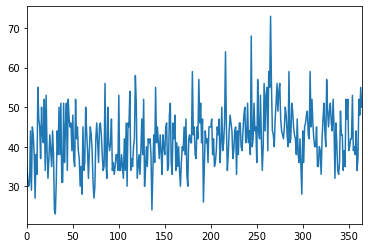

In [10]:
dataviz_df.births.plot()

In [11]:
dataviz_df.index

RangeIndex(start=0, stop=365, step=1)

In [12]:
# Vhange the Values of Index from Numbers to Date
dataviz_df.index = dataviz_df.date

In [14]:
dataviz_df.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


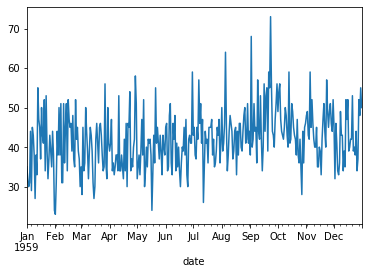

In [15]:
dataviz_df.births.plot()

## Zooming In
* Taking only a particular time Period and Plotting

In [18]:
dataviz_df1 = dataviz_df[(dataviz_df.date > '1959-01-01') & (dataviz_df.date < '1959-01-10')].copy()

In [20]:
dataviz_df1

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


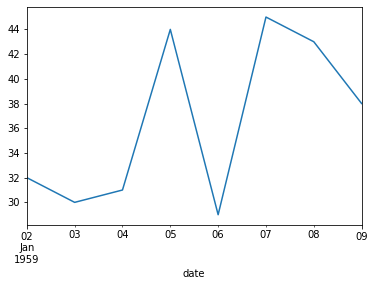

In [22]:
dataviz_df1.births.plot()

## Trendline

In [23]:
#Import Seaborn
import seaborn as sns

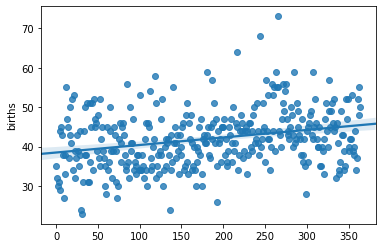

In [30]:
# .regplot will Automatically plot a Trendline
# We will take Index values instead of Date as Scatter Plot Doesnt Support Date.
#This is a Linear Trendline
sns.regplot(x = df1.index.values, y = df1['births'])

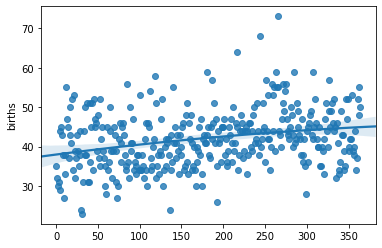

In [32]:
#This is a Quadratic Trendline
sns.regplot(x = df1.index.values, y = df1.births, order=2)

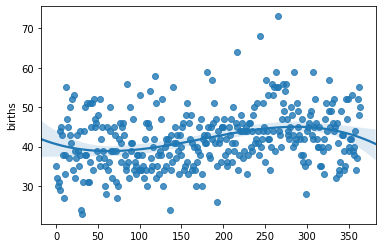

In [33]:
# This is an Cubic Trendline
sns.regplot(x=df1.index.values, y=df1.births, order=3)

In [35]:
# Lets Import Another Dataset for Visualization
miles_df = pd.read_csv('E:/Time Series Analysis and Forecasting Using Python/1. Time Series - Basics(Data and Code)/us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates = [0])

In [36]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


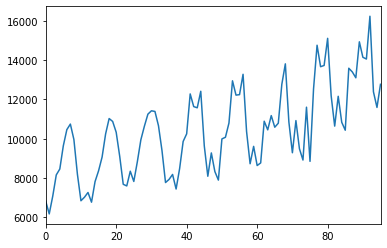

In [37]:
miles_df.MilesMM.plot()

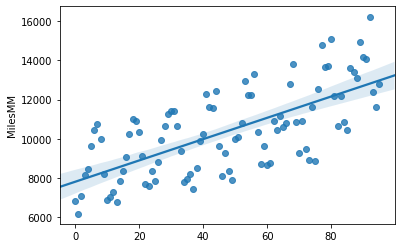

In [38]:
sns.regplot(x=miles_df.index.values, y = miles_df.MilesMM)

## Removing Seasonality

In [41]:
# Create Another Column named Year and Store the Year value using .dt.year Function
miles_df['Year'] = miles_df.Month.dt.year
miles_df.head()

,Month,MilesMM,Year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [40]:
# Now we will Group the Data by Year and Take the Average of MilesMM
miles_df.groupby('Year')['MilesMM'].mean()

Year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

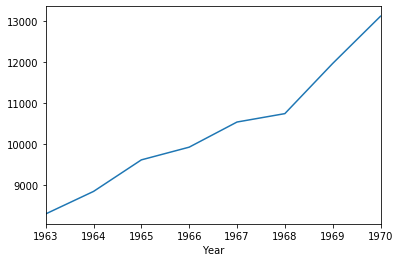

In [42]:
#Lets Plot and see
miles_df.groupby('Year')['MilesMM'].mean().plot()

## Lagged Scatter Plot

In [43]:
# For Lag1 we will input value 1 in Shift function
miles_df['Lag1'] = miles_df.MilesMM.shift(1)

In [44]:
miles_df.head()

,Month,MilesMM,Year,Lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [45]:
# For Lag2 we will input 2 in Shift Function
miles_df['Lag2'] = miles_df.MilesMM.shift(2)

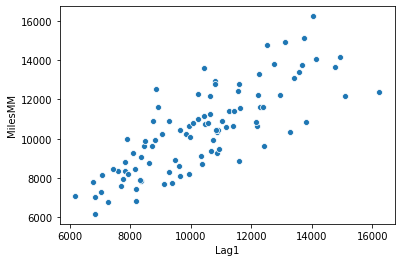

In [46]:
# Lets plot it
sns.scatterplot(x=miles_df.Lag1, y = miles_df.MilesMM)

In [48]:
#Another way of Plotting LagPlot
from pandas.plotting import lag_plot

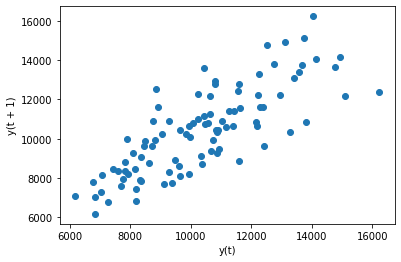

In [49]:
lag_plot(miles_df.MilesMM)

## AutoCorrelation Plot

In [50]:
from pandas.plotting import autocorrelation_plot

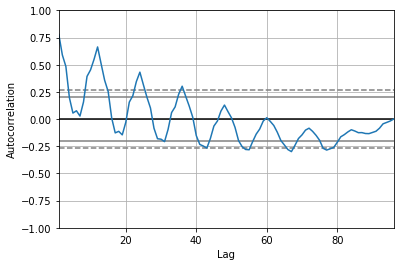

In [51]:
# To Find Correlation for Many Lagged Variables
autocorrelation_plot(miles_df.MilesMM)